<a href="https://colab.research.google.com/github/hmyrcmn/AtfStudiosProject/blob/main/facebokdataset_ile_test_edilen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers torchvision pillow
!pip install icrawler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [2]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os


In [3]:
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

In [4]:
# Giriş ve çıkış klasörleri
input_folder = "/content/drive/MyDrive/HıjyenDatayolo/mask07kasımYOLO-detr/images/test"
output_folder = "/content/Mask-boneHumanDetected"
os.makedirs(output_folder, exist_ok=True)

# Resim dosyalarını al
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Her resim için işle
for img_name in image_files:
    image_path = os.path.join(input_folder, img_name)
    image = Image.open(image_path).convert("RGB")

    # Model tahmini
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

    # Her nesneyi kontrol et
    for i, (score, label, box) in enumerate(zip(results["scores"], results["labels"], results["boxes"])):
        label_name = model.config.id2label[label.item()]

        if label_name.lower() == "person":  # sadece insan
            box = [int(i) for i in box.tolist()]
            x_min, y_min, x_max, y_max = box

            # Görüntü boyutları dışına taşmasın
            x_min = max(0, x_min)
            y_min = max(0, y_min)
            x_max = min(image.width, x_max)
            y_max = min(image.height, y_max)

            cropped = image.crop((x_min, y_min, x_max, y_max))

            # Kaydet
            output_name = f"{os.path.splitext(img_name)[0]}_person{i+1}.jpg"
            cropped.save(os.path.join(output_folder, output_name))

print("✅ Sadece 'person' (insan) nesneleri kırpıldı ve 'person_crops/' klasörüne kaydedildi.")

✅ Sadece 'person' (insan) nesneleri kırpıldı ve 'person_crops/' klasörüne kaydedildi.


In [5]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00


# burada insan olarak tespit edilmiş görseller predict için eğitilmiş olan kendi modelimize gönderidli

In [6]:
from ultralytics import YOLO
import os

# Modeli yükle (örneğin: 'best.pt')
model_path = "/content/drive/MyDrive/HıjyenDatayolo/train/weights/best.pt"  # kendi model ağırlığını buraya koy
model = YOLO(model_path)

# Girdi klasörü (yüz kırpılmış resimler)
input_dir = "/content/Mask-boneHumanDetected"
output_dir = "/content/Mask-boneHumanDetected/yolo_outputs"
os.makedirs(output_dir, exist_ok=True)

# Tüm yüz kırpıntılarına inference yap
results = model.predict(
    source=input_dir,        # klasördeki resimler
    conf=0.25,               # güven eşiği
    save=True,               # tahminleri kaydet
    save_txt=True,           # .txt formatında bbox bilgileri
    project=output_dir,      # çıktı klasörü
    name="predictions",      # alt klasör adı
    exist_ok=True            # üzerine yazabilsin
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/231 /content/Mask-boneHumanDetected/image_103_jpg.rf.9da44bf113ce1e0f007d255819b8bc73_person1.jpg: 640x448 1 bone, 236.8ms
image 2/231 /content/Mask-boneHumanDetected/image_103_jpg.rf.9da44bf113ce1e0f007d255819b8bc73_person3.jpg: 640x416 1 bone, 221.6ms
image 3/231 /content/Mask-boneHumanDetected/image_103_jpg.rf.9da44bf113ce1e0f007d255819b8bc73_person4.jpg: 640x416 1 bone, 1 mask, 217.9ms
image 4/231 /content/Mask-boneHumanDetected/image_108_jpg.rf.a2f7abd1903cad6889d5c8db388c201e_person3.jpg: 640x352 (no detections), 182.8ms
image 5/231 /content/Mask-boneHumanDetected/image_108_jpg.rf.a2f7abd1903cad6889d5c8db388c201e_person4.jpg: 640x416 1 bone, 2 nomasks, 200.3ms
image

# insan olarak test edilmeden ;

In [7]:
from ultralytics import YOLO
import os

# Modeli yükle (örneğin: 'best.pt')
model_path = "/content/drive/MyDrive/HıjyenDatayolo/train/weights/best.pt"  # kendi model ağırlığını buraya koy
model = YOLO(model_path)

# Girdi klasörü (yüz kırpılmış resimler)
input_dir = "/content/drive/MyDrive/HıjyenDatayolo/mask07kasımYOLO-detr/images/test"
output_dir = "/content/Mask-boneHumanDetected/yolo_outputs2"
os.makedirs(output_dir, exist_ok=True)

# Tüm yüz kırpıntılarına inference yap
results = model.predict(
    source=input_dir,        # klasördeki resimler
    conf=0.25,               # güven eşiği
    save=True,               # tahminleri kaydet
    save_txt=True,           # .txt formatında bbox bilgileri
    project=output_dir,      # çıktı klasörü
    name="predictions",      # alt klasör adı
    exist_ok=True            # üzerine yazabilsin
)



image 1/119 /content/drive/MyDrive/HıjyenDatayolo/mask07kasımYOLO-detr/images/test/image_103_jpg.rf.9da44bf113ce1e0f007d255819b8bc73.jpg: 640x640 2 bones, 2 masks, 345.8ms
image 2/119 /content/drive/MyDrive/HıjyenDatayolo/mask07kasımYOLO-detr/images/test/image_108_jpg.rf.a2f7abd1903cad6889d5c8db388c201e.jpg: 640x640 1 bone, 2 nomasks, 329.3ms
image 3/119 /content/drive/MyDrive/HıjyenDatayolo/mask07kasımYOLO-detr/images/test/image_112_jpg.rf.f86c89a61d358a11a0d3f060053bab30.jpg: 640x640 1 bone, 1 mask, 180.9ms
image 4/119 /content/drive/MyDrive/HıjyenDatayolo/mask07kasımYOLO-detr/images/test/image_117_jpg.rf.2f803ed58dcebdb19aed6408d251e81f.jpg: 640x640 1 bone, 180.6ms
image 5/119 /content/drive/MyDrive/HıjyenDatayolo/mask07kasımYOLO-detr/images/test/image_117_jpg.rf.8034df50573228950a9b4be9cc52b039.jpg: 640x640 1 nomask, 181.6ms
image 6/119 /content/drive/MyDrive/HıjyenDatayolo/mask07kasımYOLO-detr/images/test/image_121_jpg.rf.68c40f1500d02dc530a514ac9d1e3626.jpg: 640x640 1 bone, 1 ma

In [10]:
%cd /content/Mask-boneHumanDetected/yolo_outputs/predictions
!ls

/content/Mask-boneHumanDetected/yolo_outputs/predictions
image_103_jpg.rf.9da44bf113ce1e0f007d255819b8bc73_person1.jpg
image_103_jpg.rf.9da44bf113ce1e0f007d255819b8bc73_person3.jpg
image_103_jpg.rf.9da44bf113ce1e0f007d255819b8bc73_person4.jpg
image_108_jpg.rf.a2f7abd1903cad6889d5c8db388c201e_person3.jpg
image_108_jpg.rf.a2f7abd1903cad6889d5c8db388c201e_person4.jpg
image_112_jpg.rf.f86c89a61d358a11a0d3f060053bab30_person1.jpg
image_112_jpg.rf.f86c89a61d358a11a0d3f060053bab30_person3.jpg
image_112_jpg.rf.f86c89a61d358a11a0d3f060053bab30_person4.jpg
image_117_jpg.rf.8034df50573228950a9b4be9cc52b039_person1.jpg
image_121_jpg.rf.68c40f1500d02dc530a514ac9d1e3626_person1.jpg
image_121_jpg.rf.68c40f1500d02dc530a514ac9d1e3626_person4.jpg
image_121_jpg.rf.68c40f1500d02dc530a514ac9d1e3626_person5.jpg
image_121_jpg.rf.68c40f1500d02dc530a514ac9d1e3626_person6.jpg
image_121_jpg.rf.68c40f1500d02dc530a514ac9d1e3626_person7.jpg
image_121_jpg.rf.68c40f1500d02dc530a514ac9d1e3626_person9.jpg
image_122_jpg

In [11]:
%cd /content/Mask-boneHumanDetected/yolo_outputs2/predictions
!ls

/content/Mask-boneHumanDetected/yolo_outputs2/predictions
image_103_jpg.rf.9da44bf113ce1e0f007d255819b8bc73.jpg
image_108_jpg.rf.a2f7abd1903cad6889d5c8db388c201e.jpg
image_112_jpg.rf.f86c89a61d358a11a0d3f060053bab30.jpg
image_117_jpg.rf.2f803ed58dcebdb19aed6408d251e81f.jpg
image_117_jpg.rf.8034df50573228950a9b4be9cc52b039.jpg
image_121_jpg.rf.68c40f1500d02dc530a514ac9d1e3626.jpg
image_122_jpg.rf.fdc2b395729d2a3d6c4ff466dabbda60.jpg
image_124_jpg.rf.6e4a3da1fcccd369ef949d3ad7281533.jpg
image_129_jpg.rf.f7bdc1a1e88d5becbed8600de2278c5f.jpg
image_12_jpg.rf.82a1f6473b0a4b392619b9dd0cbbaceb.jpg
image_12_jpg.rf.c10fc5f5531f9b1cb212a8e7baf876c8.jpg
image_137_jpg.rf.4285c040af8af81e107a5e82ffb9d171.jpg
image_139_jpg.rf.629595f2bad70c1860c8e64b06bcb9dc.jpg
image_140_jpg.rf.05438c999521c9ddc87d052532a61e56.jpg
image_153_jpg.rf.a9039b50df5ecbd4b0a9144ae86cc2e0.jpg
image_153_jpg.rf.ba786d89d563b1719b96830713ebc375.jpg
image_154_jpg.rf.a2c8438dff16850728c7651677878453.jpg
image_156_jpg.rf.60adac293

# karşılatırma için a

In [17]:
# Verilen dizin yolları
input_folder = "/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels"
output_folder = "/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels2"

# Çıktı klasörü oluşturuluyor
import os
os.makedirs(output_folder, exist_ok=True)

# Tüm tahmin dosyalarını bul
from glob import glob
prediction_files = glob(os.path.join(input_folder, "*.txt"))

# Eğer dosya yoksa hata mesajı ver
if not prediction_files:
    print(f"Dosya bulunamadı: {input_folder}")
else:
    print(f"{len(prediction_files)} dosya bulundu: {prediction_files}")

# Dosyaları görüntü ismine göre grupla
merged_predictions = {}
for pred_file in prediction_files:
    filename = os.path.basename(pred_file)
    # Örn: image_103_jpg.rf.xxxxxx_person1.txt -> image_103_jpg.rf.xxxxxx
    base_name = filename.split("_person")[0]  # 'person' kısmını kaldır
    if base_name not in merged_predictions:
        merged_predictions[base_name] = []
    with open(pred_file, "r") as f:
        merged_predictions[base_name].extend(f.readlines())

# Her grup için tek bir dosyada birleştir ve person'ı dosya isminden kaldır
for base_name, lines in merged_predictions.items():
    output_path = os.path.join(output_folder, f"{base_name}.txt")

    # Dosya yazma işlemi
    with open(output_path, "w") as f:
        f.writelines(lines)

    # Dosya yazıldıktan sonra kontrol mesajı
    print(f"Dosya kaydedildi: {output_path}")

# Başarıyla kaydedilen yeni klasörü göster
output_folder

133 dosya bulundu: ['/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels/image_41_jpg.rf.d63f8c35edb8d0fc7549344dab25b895_person1.txt', '/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels/image_249_jpg.rf.a2616f6b35e1835d1480161b9a979a18_person1.txt', '/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels/image_273_jpg.rf.62e91bcdd7831e405c70033771cde6e3_person3.txt', '/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels/image_154_jpg.rf.a2c8438dff16850728c7651677878453_person1.txt', '/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels/image_12_jpg.rf.c10fc5f5531f9b1cb212a8e7baf876c8_person7.txt', '/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels/image_260_jpg.rf.04430598bd7f687f93cfa7cf36a49c89_person5.txt', '/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels/image_266_jpg.rf.325a3a572a3b891cb3beccb71aed61c8_person9.txt', '/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels/image_358_jpg.

'/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels2'

In [29]:
%cd /content/Mask-boneHumanDetected/yolo_outputs/predictions/labels2
import os

# Hedef dizin
directory_path = "/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels2"

# Dizin var mı kontrol et
if os.path.exists(directory_path):
    # Sadece dosyaları say (alt klasörleri hariç tut)
    file_count = len([f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))])
    print(f"Dizindeki dosya sayısı: {file_count}")
else:
    print(f"Hata: Dizin '{directory_path}' bulunamadı.")

/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels2
Dizindeki dosya sayısı: 77


In [30]:
%cd /content/Mask-boneHumanDetected/yolo_outputs/predictions/labels2
import os

# Hedef dizin
directory_path = "/content/Mask-boneHumanDetected/yolo_outputs2/predictions/labels"

# Dizin var mı kontrol et
if os.path.exists(directory_path):
    # Sadece dosyaları say (alt klasörleri hariç tut)
    file_count = len([f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))])
    print(f"Dizindeki dosya sayısı: {file_count}")
else:
    print(f"Hata: Dizin '{directory_path}' bulunamadı.")

/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels2
Dizindeki dosya sayısı: 111


#test

In [24]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from glob import glob

# Ground truth (etiklenen veriler) ve tahmin verilerini yükleyelim
def load_yolo_labels(label_folder):
    labels = {}
    for label_file in glob(os.path.join(label_folder, "*.txt")):
        filename = os.path.basename(label_file).split(".")[0]  # Dosya ismini al
        with open(label_file, "r") as f:
            labels[filename] = [line.strip().split() for line in f.readlines()]  # her satırı al
    return labels

# Ground truth ve tahmin verilerini yükle
ground_truth_folder = "/content/Mask-boneHumanDetected/yolo_outputs2/predictions/labels"
predictions_folder = "/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels2"


In [33]:
import os
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Ground truth ve prediction dizinleri
gt_dir = "/content/Mask-boneHumanDetected/yolo_outputs2/predictions/labels"
pred_dir = "/content/Mask-boneHumanDetected/yolo_outputs/predictions/labels2"

# Ortak dosya adlarını al (uzantısız)
gt_files = set(os.path.splitext(f)[0] for f in os.listdir(gt_dir) if f.endswith(".txt"))
pred_files = set(os.path.splitext(f)[0] for f in os.listdir(pred_dir) if f.endswith(".txt"))

y_true = []
y_pred = []

for file_name in gt_files:
    gt_path = os.path.join(gt_dir, file_name + ".txt")
    pred_path = os.path.join(pred_dir, file_name + ".txt")

    # Ground truth etiketini oku
    with open(gt_path, "r") as f:
        gt_lines = f.readlines()

    # Eğer ground truth dosyası boşsa ve prediction dosyası da yoksa -> es geç
    if not gt_lines and file_name not in pred_files:
        print(f"{file_name} etiketsiz ve tahmin yapılmamış, es geçiliyor.")
        continue

    # Ground truth sınıfları
    gt_labels = [int(line.split()[0]) for line in gt_lines if line.strip()]

    # Prediction yoksa -> 0 tahmini yapılmış gibi davran
    if file_name not in pred_files:
        print(f"{file_name} dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.")
        y_pred.extend([0] * len(gt_labels))
        y_true.extend(gt_labels)
        continue

    # Prediction varsa
    with open(pred_path, "r") as f:
        pred_lines = f.readlines()

    pred_labels = [int(line.split()[0]) for line in pred_lines if line.strip()]

    # Uzunluk eşit değilse, küçük olan kadar karşılaştır (minimum sayıda eşle)
    min_len = min(len(gt_labels), len(pred_labels))
    y_true.extend(gt_labels[:min_len])
    y_pred.extend(pred_labels[:min_len])

# Metrikleri yazdır
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["bone", "nomask", "mask", "nobone"]))


image_248_jpg.rf.c1f817e677dbb140245adc5113fa3dc3 dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.
image_328_jpg.rf.936581bd11b96554c12938db1fcf953d dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.
image_306_jpg.rf.c889320c4114bfc6839713b24522e634 dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.
image_117_jpg.rf.2f803ed58dcebdb19aed6408d251e81f dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.
image_99_jpg.rf.20ddc78f4deb63983960cc7d011f141b dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.
image_334_jpg.rf.bc33ec498a218a8c0dd4775428522126 dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.
image_42_jpg.rf.3c5b911c16747a1e414721bbbd292212 dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.
image_179_jpg.rf.eba7830cc54dcaa7b264bb1166a1f8e5 dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.
image_268_jpg.rf.f4f1357fb691c15f6c19db3552fbbafb dosyası tahmin edilmemiş. Tahmin olarak 0 kabul edilecek.
image_382_jpg.rf.52060f18f8d8d

In [34]:

# Ortak dosya isimleri
gt_files = set(os.path.splitext(f)[0] for f in os.listdir(gt_dir) if f.endswith(".txt"))
pred_files = set(os.path.splitext(f)[0] for f in os.listdir(pred_dir) if f.endswith(".txt"))

y_true = []
y_pred = []

for file_name in gt_files:
    gt_path = os.path.join(gt_dir, file_name + ".txt")
    pred_path = os.path.join(pred_dir, file_name + ".txt")

    # Ground truth içeriği
    with open(gt_path, "r") as f:
        gt_lines = [line.strip() for line in f if line.strip()]
    gt_labels = [int(line.split()[0]) for line in gt_lines]

    # Durum 1: Prediction yok VE ground boşsa → es geç
    if file_name not in pred_files and not gt_labels:
        print(f"{file_name} etiketsiz ve tahmin yapılmamış, es geçiliyor.")
        continue

    # Durum 2: Prediction yok VE ground doluysa → model background tahmin etti, başarısız → y_pred'e 4 (arka plan) eklenir
    if file_name not in pred_files and gt_labels:
        print(f"{file_name} tahmin edilmemiş. Etiketler var, model hiçbir şey bulamamış → background kabul ediliyor.")
        y_true.extend(gt_labels)
        y_pred.extend([4] * len(gt_labels))  # 4 = background olarak düşünebiliriz
        continue

    # Prediction dosyası varsa:
    with open(pred_path, "r") as f:
        pred_lines = [line.strip() for line in f if line.strip()]
    pred_labels = [int(line.split()[0]) for line in pred_lines]

    # Eşit sayıda değilse en az olan kadar eşle
    min_len = min(len(gt_labels), len(pred_labels))
    y_true.extend(gt_labels[:min_len])
    y_pred.extend(pred_labels[:min_len])

# Sınıf isimleri (senin formatına göre + arka plan)
class_names = ["bone", "nomask", "mask", "nobone", "background"]

# Metrikleri hesapla
print("\n🔍 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

image_248_jpg.rf.c1f817e677dbb140245adc5113fa3dc3 tahmin edilmemiş. Etiketler var, model hiçbir şey bulamamış → background kabul ediliyor.
image_328_jpg.rf.936581bd11b96554c12938db1fcf953d tahmin edilmemiş. Etiketler var, model hiçbir şey bulamamış → background kabul ediliyor.
image_306_jpg.rf.c889320c4114bfc6839713b24522e634 tahmin edilmemiş. Etiketler var, model hiçbir şey bulamamış → background kabul ediliyor.
image_117_jpg.rf.2f803ed58dcebdb19aed6408d251e81f tahmin edilmemiş. Etiketler var, model hiçbir şey bulamamış → background kabul ediliyor.
image_99_jpg.rf.20ddc78f4deb63983960cc7d011f141b tahmin edilmemiş. Etiketler var, model hiçbir şey bulamamış → background kabul ediliyor.
image_334_jpg.rf.bc33ec498a218a8c0dd4775428522126 tahmin edilmemiş. Etiketler var, model hiçbir şey bulamamış → background kabul ediliyor.
image_42_jpg.rf.3c5b911c16747a1e414721bbbd292212 tahmin edilmemiş. Etiketler var, model hiçbir şey bulamamış → background kabul ediliyor.
image_179_jpg.rf.eba7830cc54d

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


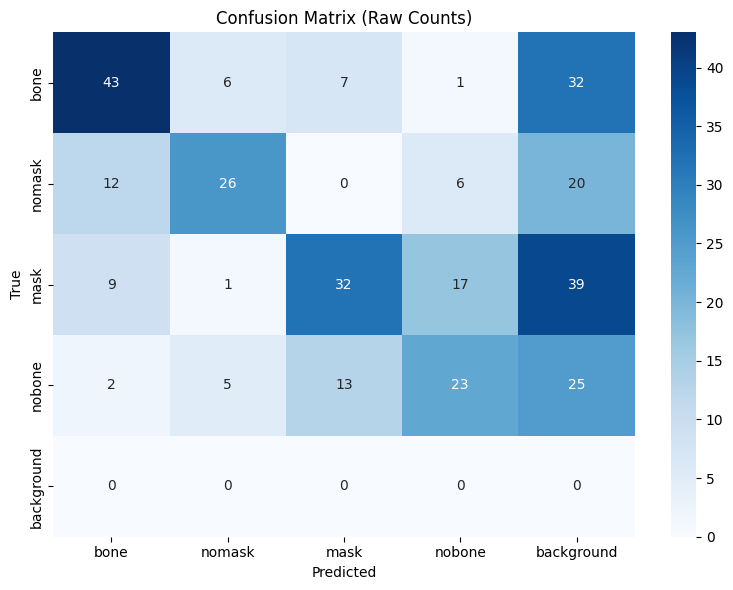

<ipython-input-35-974492063181>:20: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


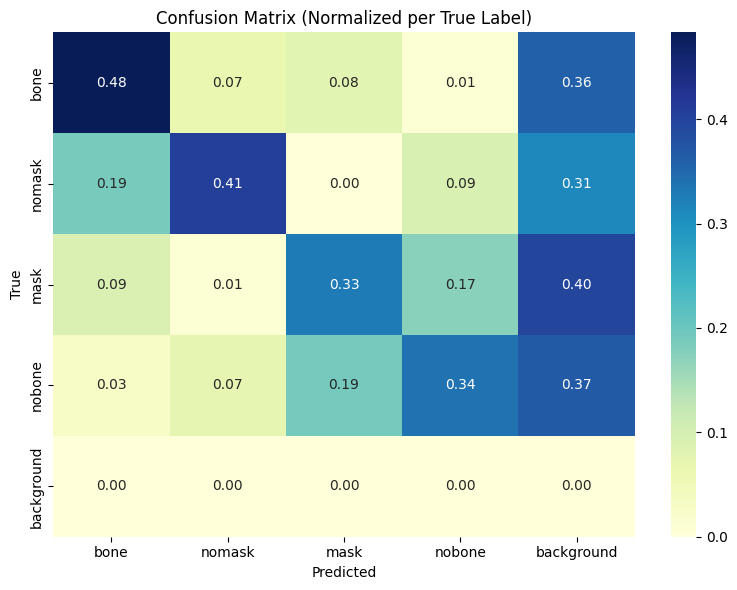

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


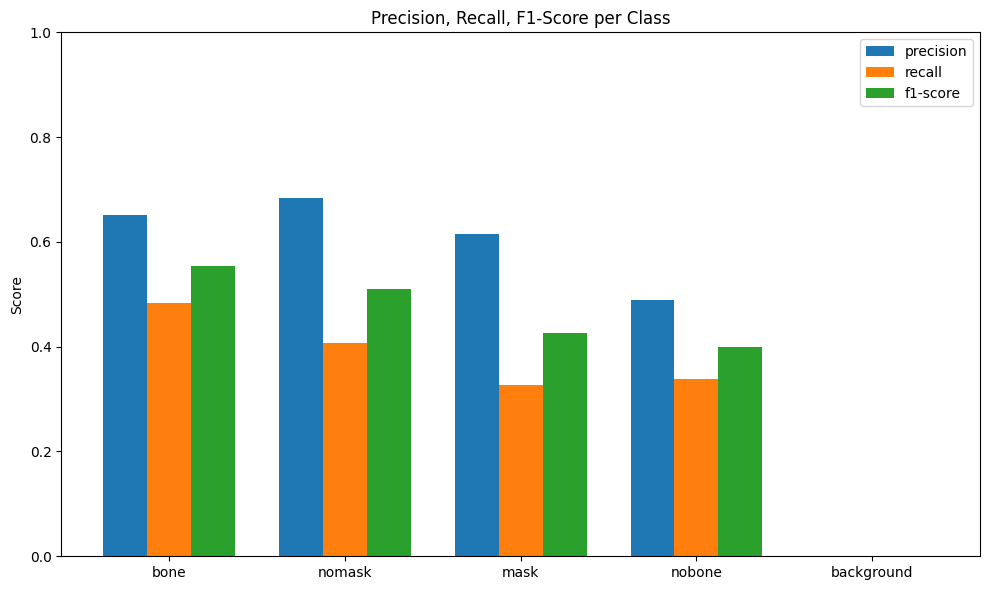

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 🔧 Confusion matrix ve etiketler
cm = confusion_matrix(y_true, y_pred)
labels = ['bone', 'nomask', 'mask', 'nobone', 'background']

# 🔷 1. Confusion Matrix - Raw Counts
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Raw Counts)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 🔷 2. Confusion Matrix - Normalized (per row)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized = np.nan_to_num(cm_normalized)  # sıfıra bölünme hatasını engelle

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Normalized per True Label)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 🔷 3. Precision, Recall, F1-score Bar Chart
report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
classes = [cls for cls in report if cls in labels]

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    values = [report[cls][metric] for cls in classes]
    plt.bar(np.arange(len(classes)) + i * 0.25, values, width=0.25, label=metric)

plt.xticks(np.arange(len(classes)) + 0.25, classes)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Precision, Recall, F1-Score per Class")
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
# Kaynak: Drive'daki klasör, Hedef: Colab dosya sistemi
source_folder = "//content/Mask-boneHumanDetected"
target_folder = "/content/drive/MyDrive/HıjyenDatayoloTESTED"

!cp -r  "$source_folder" "$target_folder"

In [39]:
!jupyter nbconvert --clear-output --inplace your_notebook.ipynb
!jupyter nbconvert --to notebook --ClearMetadataPreprocessor.enabled=True your_notebook.ipynb --output cleaned_notebook.ipynb

[NbConvertApp] WARNING | pattern 'your_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 